<a href="https://colab.research.google.com/github/gcochlar/Bootcamp_DataScience/blob/main/Modulo_01/Bootcamp_Mod1_Aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=16O9eMrtSeRDnDpZgmneXj34eIClCntvg">

# **Analisando Dados da Saúde com Python e Pandas**

Esse notebook vai servir de acompanhamento para toda a aula 01 (6 atividades), bem como rascunho para testar melhorias que deverão ir para o caderno específico de desafios.

A aula trata da aquisição e leitura de dados reais, obtidos diretamente da internet, sem prévio tratamento.


---

**[Edit]** Esse notebook será usado ao longo de todo o módulo em função da continuidade das informações. Vou usar as seções para separar as aulas e os desafios e estou usando outros documentos para rascunho e testes de melhorias. 

## Aula 01 - Aquisição e Leitura de Dados Reais

### Aula 01 - Vídeo 01
Atividade 03



Como de praxe, o primeiro bloco vai servir para importar as bibliotecas que serão necessárias ao longo do caderno e estabelecer algumas regras de formatação que também iremos usar.

In [ ]:
#Biblioteca de Análise de Dados
import pandas as pd
import random
import numpy as np

#Bibliotecas de Criação de Visualizações Gráficas
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

#Bibliotecas de Apresentação de Informações no Google Colab
from google.colab import widgets, output

pd.options.display.float_format = "{:.2f}".format

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   ITALIC = '\033[3m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

O segundo bloco cria as variáveis que contém as diversas URLs onde poderemos acessar os arquivos que servirão de base de dados para nossas investigações.

Os arquivos foram obtidos através de acesso ao DataSUS usando a funcionalidade do TabNet, no portal mantido pelo Governo Federal ([DataSUS](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi)).

Os dados podem ser consultados de diversas formas, selecionando as informações que queremos e o que constará na estrutura de linhas e colunas a ser gerada.

Para o nosso estudo inicial, selecionamos as informações de:

**Assistência à Saúde** >>> **Produção Hospitalar** >>> **Dados Consolidados por Local de Internação a Partir de 2008**

Na **Abrangência Geográfica**, fizemos uma importação inicial usando a opção **Brasil por Região ou Unidade da Federação** e outra selecionando **Brasil por Municípios**.

Na tela seguinte, optamos por colocar nas **Linhas** as **Unidades da Federação**, no **Conteúdo**, o **Valor Total**, nos **Períodos** marcamos todos os meses disponíveis (de **JAN/2008 até MAR/2021**) e nas **Colunas** também realizamos duas importações, uma considerando **Ano/mês processamento** e outra considerando **Ano/mês atendimento**.

Todas as bases de dados foram geradas na mesma data (18/MAI/2021) para garantir uma certa consistência das informações, pois não sabemos a periodicidade de atualização dos mesmos. Depois de obtidos, os arquivos foram carregados para o repositório no ***GitHub*** de onde estão sendo *linkados* abaixo.

In [ ]:
url_processamento_UF='https://github.com/gcochlar/Bootcamp_DataScience/raw/main/dados/BaseDadosDataSUS-Estado-Processamento.csv'
url_processamento_municipios ='https://github.com/gcochlar/Bootcamp_DataScience/blob/main/dados/BaseDadosDataSUS-Municipio-Processamento.csv?raw=true'
url_atendimento_UF='https://github.com/gcochlar/Bootcamp_DataScience/raw/main/dados/BaseDadosDataSUS-Estado-Atendimento.csv'
url_atendimento_municipios='https://github.com/gcochlar/Bootcamp_DataScience/blob/main/dados/BaseDadosDataSUS-Municipio-Atendimento.csv?raw=true'

Podemos então tentar importar o primeiro arquivo a ser analisado, que contém os dados organizados por data de processamento, separados por Estados ou UFs (Unidades da Federação).

In [ ]:
#base_de_dados=pd.read_csv(url_processamento_UF)

## Deixei esse bloco comentado para poder executar o código do notebook desde o início sempre que necessário, sem que ele interrompa nesse ponto

Apesar de termos como importar diretamente arquivos CSV pelo Python/Pandas, as tentativas iniciais resultaram em erros, que nos levaram a abrir o arquivo usando um editor de textos simples para entender melhor a sua estrutura.

Para fazer uma primeira limpeza nos dados, precisamos passar alguns parâmetro para o comando ```read_csv```. São eles:


*   ```encoding="ISO-8859-1"```, para que acerte a tabela de códigos de caracteres para o *Latin1* e aceite a acentuação
*   ```sep=";"```, para informar que o separador de campos é o ponto e vírgula e não o padrão (vírgula)
*   ```skiprows=3```, para pular as linhas iniciais, sem dados
*   ```skipfooter=12```, para desprezar as linhas finais, de rodapé



In [ ]:
base_de_dados=pd.read_csv(url_processamento_UF, encoding='ISO-8859-1', skiprows=3, sep=';',skipfooter=12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.



Importado com sucesso, podemos visualizar algumas informações de estrutura da base de dados gerada, bem como dos dados que teremos para trabalhar.

In [ ]:
guias = widgets.TabBar(['Estrutura', 'Registros Iniciais','Registros Finais'], location='top')

with guias.output_to('Estrutura'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nEstrutura da Base de Dados:\n'+color.END)
    print(base_de_dados.info())
    print('\n')
    print(base_de_dados.shape)
with guias.output_to('Registros Iniciais'):
    display(base_de_dados.head())
with guias.output_to('Registros Finais'):
    display(base_de_dados.tail())


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Estrutura da Base de Dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 161 entries, Unidade da Federação to Total
dtypes: object(161)
memory usage: 34.1+ KB
None


(27, 161)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,"1388528,39","2931283,42","1541682,52","1525314,96","1645953,84","1406150,68","3065279,01","3231494,61","3117178,63","3068430,44","2825838,52","2931173,58","2885269,07","2860103,74","3684944,68","3607289,68","3774356,60","3706711,84","3763187,55","3533625,83","3605007,43","3907032,72","3939820,71","3901084,11","3684407,02","3623015,58","3890461,90","4193533,87","4534400,67","4451208,03","4874592,78","4460802,38","5067886,24","4511092,85","4394680,50","4098741,80","4411499,48","3868617,95","4298702,78",...,"7998345,94","8893683,69","8867793,32","8871408,50","8501601,67","8315107,81","8525499,78","9177611,46","7368996,38","8835095,43","8328186,64","8408512,77","9351705,82","8143007,97","8949741,77","9630553,15","9581970,31","7891114,05","9792370,67","9170787,53","8816846,71","10024554,15","9675423,70","8085025,66","9222010,60","7493901,30","8148169,46","7353768,37","7739864,47","9246097,96","11824687,13","11733307,76","10201985,14","7955139,45","9357946,29","8880836,55","9266014,59","7730597,04","11023309,47","996411254,68"
1,12 Acre,"902416,00","1497206,26","1794028,48","1730469,42","1819443,92","1828496,00","2511754,59","2089107,14","2275708,53","1923886,57","1756986,80","2235639,98","2497116,43","2253558,01","2122673,92","2834317,62","2722065,97","2432831,95","2630190,65","2307579,00",-,"2826477,02","2170791,18","2541526,44","2491042,33","1954473,90","2389996,38","2654878,60","2844085,21","2336207,19","2125143,06","2430293,67","2377738,44","2184746,84","2468452,90","2516284,54","3051370,08","2629104,42","2485451,79",...,"3576595,19","2444567,37","2602434,35","3064163,42","2276236,69","3239474,10","3126429,88","2998865,51","2619709,86","3018048,94","3342614,24","2123426,26","2664654,52","1906429,95","3096439,63","2411628,00","2840630,58","3260153,59","3250722,84","3204998,88","3052745,65","3124802,29","3021521,75","2874871,28","3331803,55","3417691,07","3076003,20","2286642,60","2896340,24","3045245,80","3915193,20","3640142,82","3391242,21","4044321,44","3276590,10","3696997,31","3715723,12","3538427,92","4077045,92","450048530,47"
2,13 Amazonas,"4735529,42","7118990,57","8196635,49","8259378,42","7831399,90","8477273,62","9368858,72","9352532,70","9363099,35","8618318,83","6555549,08","7777645,88","7403068,36","6683346,89","9927781,20","8844511,21","9079035,96","8832894,53","9373395,97","9578326,03","9730634,16","9179252,65","8314648,93","9050439,39","9419460,86","8680178,57","9168055,41","9897901,80","9651362,37","10854599,47","10417122,89","8718347,13","8221592,12","9613977,03","9927574,41","9470661,21","9736750,91","8745259,80","9380112,36",...,"13572263,03","13083081,70","14322305,22","14643340,51","14632208,09","14500521,14","14840533,42","14427620,91","15818964,25","16358462,57","15391163,74","14154362,85","16791397,31","14369987,43","16339024,96","15622910,63","16483166,92","15422243,28","15961988,04","15787896,78","16515441,67","15788848,91","15784686,14","14388606,82","16063450,73","14939977,20","15107056,74","13534657,88","19698748,89","21129394,43","19769460,14","18059931,43","17841015,63","16408315,10","19895617,91","17765167,69","21430289,17","25917134,55","22032176,22","1917247936,05"
3,14 Roraima,"657889,53","777939,31","718688,03","839994,39","862347,96","832440,66","996693,0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
22,43 Rio Grande do Sul,"30931325,46","57363420,01","51547794,07","56673338,49","48397733,07","52413429,62","56636376,98","56113054,70","55356224,30","53637713,13","53699506,08","58730379,58","57629317,06","58779088,02","63366430,89","62200230,97","61683824,68","62495363,90","64614271,83","66457445,34","66425009,36","65782428,73","63714541,87","64488493,88","66304168,50","61527419,52","62490522,38","66814413,40","67900518,35","64799726,75","68518232,07","68731297,03","66174969,16","66891309,48","67456434,73","67096302,52","60754144,32","58884339,85","66205364,40",...,"88817066,36","80572288,45","87419899,25","89396935,52","88148251,61","90754504,49","89093690,14","94010888,97","93664724,68","90025945,36","93081292,31","89050712,34","89664703,23","89259306,50","85585754,75","95152786,47","94163838,23","92237333,46","102298314,76","100260145,30","95917106,56","102331615,05","93971904,79","90775418,13","94908336,74","91437940,91","102876132,83","83000318,02","82381774,95","86092502,24","100579287,65","102609965,59","104401019,54","117458292,46","108853890,98","111760506,80","119992419,94","111797400,70","130155185,16","12764391179,92"
23,50 Mato Grosso do Sul,"5377392,11","7002472,61","8423933,19","8797487,68","9770421,80","10905392,18","10249299,82","9671553,45","10218511,05","9547923,55","9450010,19","8365709,79","10033643,71","10746263,10","10849523,03","10902848,13","11991649,26","12050259,66","12174950,98","11178470,01","11997775,92","11686533,15","10756188,43","10565385,71","12148432,58","11270972,80","11947693,50","11435565,54","12392541,52","12441459,98","12025317,84","12353546,78","12381792,58","12340247,31","12467693,91","12356930,32","11209008,55","9656677,02","13698836,79",...,"16320629,25","18448053,83","16620321,36","16682027,02","17555832,83","17357780,20","17090876,79","16468255,95","17395858,50","16259261,13","16390075,24","15350893,92","17108719,02","17713810,57","16882690,96","18253870,27","17778458,45","18387822,48","19870933,20","18913862,69","19591383,84","18935437,09","17230688,81","17895244,76","18115134,64","19542439,88","19032785,73","17410262,53","17913161,92","17363192,43","18858844,44","19877080,68","19247894,51","19497210,85","22023126,25","19629591,55","21693311,15","24337295,63","25168195,34","2324525096,33"
24,51 Mato Grosso,"4795299,01","8684882,23","7886243,14","8794109,79","9231645,40","10221763,77","9163314,28","9243148,81","9052354,89","9677093,95","7150345,50","10421826,32","9939399,66","9332546,32","11965500,15","11185014,96","12058150,55","11635436,04","11698836,48","11823239,61","10810420,65","12130636,06","11574096,75","10726251,53","12364760,67","11382133,07","11947040,32","12233217,84","12656421,09","11263407,74","12795267,96","12805173,87","12171713,91","11961452,83","11777799,00","11142684,27","11709080,86","11149107,81","12381255,67",...,"17253950,09","14789801,16","17498946,87","16279852,74","16103988,77","15883977,51","17163673,03","15569285,17","15630276,46","15838064,68","14815961,13","13853034,99","14229113,36","15288698,79","16045499,92","15890208,95","16092716,67","16699780,69","16314811,22","16763581,32","15608982,84","15855641,23","15823328,54","15032737,51","15259436,50","15066106,66","14906973,08","12563655,61","13632848,78","13215428,53","16834650,98"

<IPython.core.display.Javascript object>

Podemos verificar que foi feita a importação de 27 linhas, consistente com o que esperávamos (26 estados e o Distrito Federal) e 161 colunas, iniciando com a Unidade da Federação (já com um código numérico no início do texto), as informações mensais dos 13 anos (de 2008 à 2020), os 3 meses de 2021 e uma coluna de Total ao final.

No entanto, os dados foram identificados como *object* (*string*) e não como números. Isso porque a nossa notação usa vírgulas para separar os centavos e pontos para separar os milhares, ao contrário do padrão americano.

Precisamos corrigir isso também na nossa importação, adicionando mais dois parâmetros, ```thousands``` e ```decimal```.

In [ ]:
base_de_dados=pd.read_csv(url_processamento_UF, encoding='ISO-8859-1', skiprows=3, sep=';',skipfooter=12, thousands='.', decimal=',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.



Agora podemos visualizar melhor o que temos em nossa base de dados.

In [ ]:
guias = widgets.TabBar(['Estrutura', 'Registros Iniciais','Registros Finais','Preliminar'], location='top')

with guias.output_to('Estrutura'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nEstrutura da Base de Dados:\n'+color.END)
    print(base_de_dados.info())
    print('\n')
    print(base_de_dados.shape)
with guias.output_to('Registros Iniciais'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nRegistros Iniciais:\n'+color.END)
    display(base_de_dados.head())
with guias.output_to('Registros Finais'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nRegistros Finais:\n'+color.END)
    display(base_de_dados.tail())
with guias.output_to('Preliminar'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nAnálise Preliminar:\n'+color.END)
    display(base_de_dados.describe().T)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Estrutura da Base de Dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 161 entries, Unidade da Federação to Total
dtypes: float64(159), object(2)
memory usage: 34.1+ KB
None


(27, 161)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Registros Iniciais:



,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,2938769.3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Registros Finais:



,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,88817066.36,80572288.45,87419899.25,89396935.52,88148251.61,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,102298314.76,100260145.30,95917106.56,102331615.05,93971904.79,90775418.13,94908336.74,91437940.91,102876132.83,83000318.02,82381774.95,86092502.24,100579287.65,102609965.59,104401019.54,117458292.46,108853890.98,111760506.80,119992419.94,111797400.70,130155185.16,12764391179.92
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,16320629.25,18448053.83,16620321.36,16682027.02,17555832.83,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,19870933.20,18913862.69,19591383.84,18935437.09,17230688.81,17895244.76,18115134.64,19542439.88,19032785.73,17410262.53,17913161.92,17363192.43,18858844.44,19877080.68,19247894.51,19497210.85,22023126.25,19629591.55,21693311.15,24337295.63,25168195.34,2324525096.33
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,17253950.09,14789801.16,17498946.87,16279852.74,16103988.77,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,16314811.22,16763581.32,15608982.84,15855641.23,15823328.54,15032737.51,15259436.50,15066106.66,14906973.08,12563655.61,13632848.78,13215428.53,16834650.98,19704915.36,20746227.60,22727405.20,20506039.58,19583803.46,19120141.68,18349376.92,19611032.61,2180119781.15
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.22,23520045.07,25369725.89,24404417.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Análise Preliminar:



,count,mean,std,min,25%,50%,75%,max
2008/Jan,27.00,15126846.64,19159188.30,657889.53,4740724.30,7985142.43,17684828.78,91678473.48
2008/Fev,27.00,22710158.12,30879444.07,777939.31,7060731.59,10079928.25,25693265.33,148677526.82
2008/Mar,27.00,24594187.35,32516725.69,718688.03,8041439.31,10352238.59,29357964.23,156087269.23
2008/Abr,27.00,25431957.83,33339066.25,839994.39,8526744.11,11253833.56,32741327.52,161227125.43
2008/Mai,27.00,26511245.91,37540771.63,862347.96,8531522.65,12215107.11,31376220.41,187119397.64
...,...,...,...,...,...,...,...,...
2020/Dez,27.00,53377763.15,69629260.36,675277.05,17785220.53,23846816.35,70655565.76,330489045.98
2021/Jan,27.00,56073748.02,73766807.81,419553.49,18331663.28,28044464.51,75966083.87,355149525.60
2021/Fev,27.00,55578233.31,72846413.77,319160.87,18438153.15,26317613.74,74950094.36,348827130.99
2021/Mar,27.00,62502301.42,82320629.42,1357751.33,19814679.18,31831917.45,82623811.65,392946147.42


<IPython.core.display.Javascript object>

Apesar de parecer ter importado corretamente, podemos notar na aba Estrutura que o Python continua apontando para 2 colunas do tipo *string*, enquanto deveríamos ter somente uma, a primeira.

A maneira que encontrei para identificar qual mês estava com dados corrompidos foi executando o *loop* abaixo e analisando o resultado.

In [ ]:
guias = widgets.TabBar(['Geral', 'Dados Corrompidos'], location='top')

lista_de_colunas=base_de_dados.columns.to_list()

with guias.output_to('Geral'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nListagem Geral:\n'+color.END)
    for i in lista_de_colunas:
        base_temp=base_de_dados.loc[:,['Unidade da Federação',i]]
        base_temp.info()    
with guias.output_to('Dados Corrompidos'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nDados Corrompidos:\n'+color.END)
    base_de_dados.loc[:,['Unidade da Federação','2009/Set']].info()




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Listagem Geral:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unidade da Federação  27 non-null     object
 1   Unidade da Federação  27 non-null     object
dtypes: object(2)
memory usage: 560.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unidade da Federação  27 non-null     object 
 1   2008/Jan              27 non-null     float64
dtypes: float64(1), object(1)
memory usage: 560.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unidade da Federação  27 non-null     object 
 1   2008/Fev    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Dados Corrompidos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unidade da Federação  27 non-null     object
 1   2009/Set              27 non-null     object
dtypes: object(2)
memory usage: 560.0+ bytes


<IPython.core.display.Javascript object>

Aproveitando então o desafio proposto no final do vídeo, que era de analisar os dados de um mês específico, resolvi analisar essa coluna para tentar encontrar o problema.

In [ ]:
base_de_dados.loc[:,'2009/Set']

0       3605007.43
1                -
2       9730634.16
3       1701611.25
4      27967969.22
5       2034329.78
6       6542918.14
7      19722895.51
8      12247027.29
9      34471579.06
10     13213817.60
11     16117680.24
12     37971068.17
13     11170853.09
14      6341601.06
15     53839068.59
16     96911075.38
17     15382323.46
18     52027721.77
19    220292973.66
20     65843824.73
21     37380382.93
22     66425009.36
23     11997775.92
24     10810420.65
25     25227845.74
26     14487053.32
Name: 2009/Set, dtype: object

De pronto foi possível identificar que o problema estava na linha 1, que continha um hífen no lugar de um valor. Sendo assim, a coluna inteira foi importada como *string*.

Para resolver isso foi necessário substituir o hífen pelo número zero e depois converter a coluna inteira para o tipo numérico ```float```, o que foi feito com os comandos abaixo:

In [ ]:
base_de_dados.loc[1,'2009/Set']=0
base_de_dados['2009/Set'] = base_de_dados['2009/Set'].astype(float)
base_de_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 161 entries, Unidade da Federação to Total
dtypes: float64(160), object(1)
memory usage: 34.1+ KB


Agora sim temos a base de dados em condições de ser analisada mais profundamente, o que deve ser feito na próxima aula.

De forma complementar, fiz algumas experiências com uma base temporária, só para melhorar conhecimentos de manipulação de um *dataframe*.

In [ ]:
base_temp=pd.DataFrame()
base_temp=base_de_dados
base_temp.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,0.00,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,293876

Criando colunas totalizadoras para cada ano (fiz um *loop* para os anos completos mas deixei manualmente os 3 meses de 2021 que já estão na base).

In [ ]:
for i in range(2008,2021):
    i_inicial=f'{i}/Jan'
    i_final=f'{i}/Dez'
    base_temp[str(i)]=base_temp.loc[:,i_inicial:i_final].sum(axis=1)

base_temp['2021']=base_temp.loc[:,'2021/Jan':'2021/Mar'].sum(axis=1)


E criando uma coluna de variação percentual, comparando o total de gastos de 2020 com 2010.

In [ ]:
base_temp['Var 2020/2010']=(base_temp['2020']/base_temp['2010']-1)


In [ ]:
print(base_temp.columns.to_list())

['Unidade da Federação', '2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul', '2008/Ago', '2008/Set', '2008/Out', '2008/Nov', '2008/Dez', '2009/Jan', '2009/Fev', '2009/Mar', '2009/Abr', '2009/Mai', '2009/Jun', '2009/Jul', '2009/Ago', '2009/Set', '2009/Out', '2009/Nov', '2009/Dez', '2010/Jan', '2010/Fev', '2010/Mar', '2010/Abr', '2010/Mai', '2010/Jun', '2010/Jul', '2010/Ago', '2010/Set', '2010/Out', '2010/Nov', '2010/Dez', '2011/Jan', '2011/Fev', '2011/Mar', '2011/Abr', '2011/Mai', '2011/Jun', '2011/Jul', '2011/Ago', '2011/Set', '2011/Out', '2011/Nov', '2011/Dez', '2012/Jan', '2012/Fev', '2012/Mar', '2012/Abr', '2012/Mai', '2012/Jun', '2012/Jul', '2012/Ago', '2012/Set', '2012/Out', '2012/Nov', '2012/Dez', '2013/Jan', '2013/Fev', '2013/Mar', '2013/Abr', '2013/Mai', '2013/Jun', '2013/Jul', '2013/Ago', '2013/Set', '2013/Out', '2013/Nov', '2013/Dez', '2014/Jan', '2014/Fev', '2014/Mar', '2014/Abr', '2014/Mai', '2014/Jun', '2014/Jul', '2014/Ago', '2014/Set', '20

A partir das informações de variação 2020 x 2010, criei um gráfico de barras para comparar os estados em relação aos seus respectivos crescimentos de gastos.

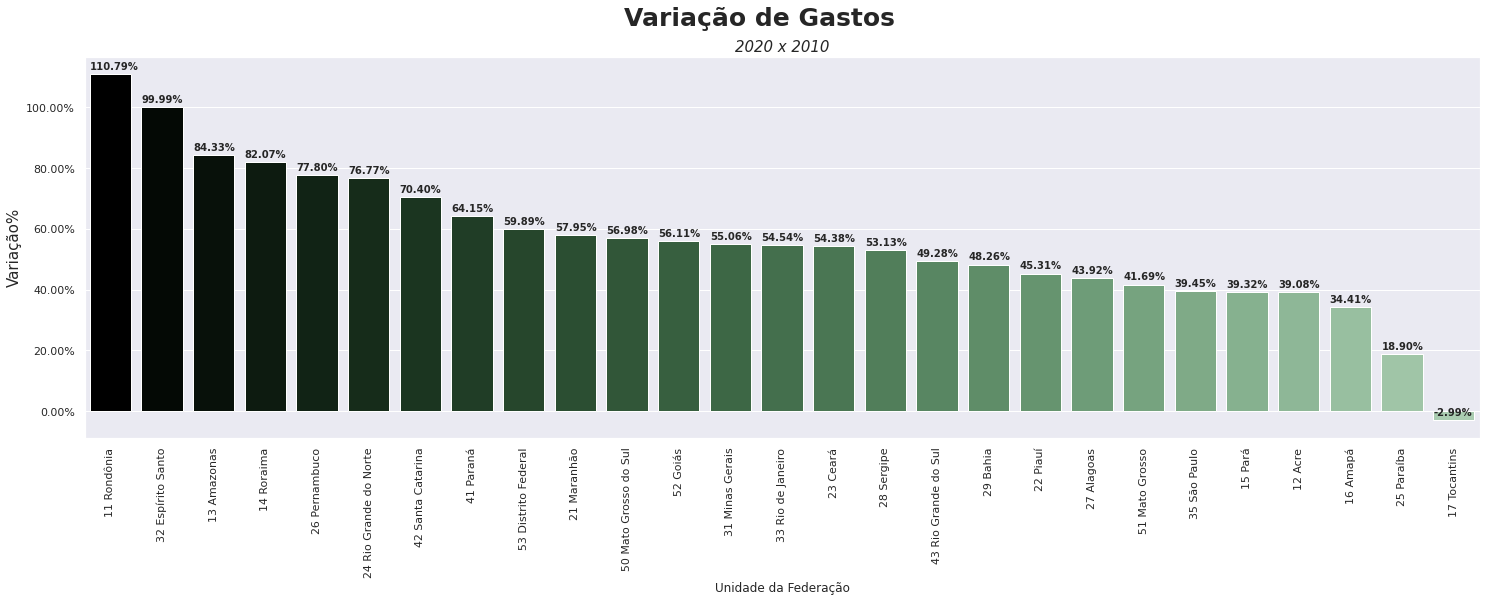

In [ ]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,7))
fig.suptitle('Variação de Gastos',fontweight='bold', fontsize=25)
palette = sns.cubehelix_palette(27, start=2, rot=0, dark=0, light=.75, reverse=True)

ordem_lista=base_temp.loc[:,['Unidade da Federação','Var 2020/2010']].sort_values(by=['Var 2020/2010'], ascending=False,ignore_index=True)

ax = sns.barplot(x = ordem_lista['Unidade da Federação'], y=ordem_lista['Var 2020/2010'],ax=ax, orient='v', palette=palette)
ax.set_title('2020 x 2010',style='italic', fontsize=15)
ax.tick_params(axis='x', rotation = 90)
ax.set_ylabel('Variação%',fontsize=15)

for p in ax.patches:
    x_valor=p.get_x()
    y_valor=p.get_y()+p.get_height()+.015
    ax.annotate('{:.2%}'.format(p.get_height()), (x_valor, y_valor),fontweight='bold',fontsize=10)
ax.tick_params(axis='x', rotation = 90)

valores_y = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in valores_y])

plt.show()


Para melhorar um pouco, já vou separar a coluna 'Unidades da Federação' em outras duas colunas, 'Código UF' e 'UF'.

In [ ]:
base_temp[['Código UF','UF']]=pd.DataFrame(base_temp['Unidade da Federação'].str.split(' ',1).tolist())
base_temp.head().T

,0,1,2,3,4
Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará
2008/Jan,1388528.39,902416.00,4735529.42,657889.53,18864744.11
2008/Fev,2931283.42,1497206.26,7118990.57,777939.31,19553758.20
2008/Mar,1541682.52,1794028.48,8196635.49,718688.03,21937342.70
2008/Abr,1525314.96,1730469.42,8259378.42,839994.39,20842829.69
...,...,...,...,...,...
2020,109157714.48,40018213.54,210212793.77,36868427.83,446873379.68
2021,28019921.10,11331196.96,69379599.94,10772232.28,109319389.58
Var 2020/2010,1.11,0.39,0.84,0.82,0.39
Código UF,11,12,13,14,15


### Aula 01 - Vídeo 02
Atividade 04

Nessa atividade iremos trabalhar melhor a parte de visualização das informações já encontradas.

Começamos tentando visualizar os dados de Agosto/2008, abertos por Unidade da Federação.

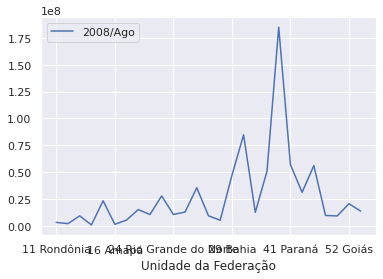

In [ ]:
base_de_dados.plot(x='Unidade da Federação', y='2008/Ago')

Fica um gráfico feio, com vários pontos a melhorar, começando pelo tipo de gráfico. Gráfico de linhas não é adequado para esse tipo de informação, sendo melhor usarmos colunas. Além disso, a escala, a posição dos nomes dos Estados e até a legenda estão inadequadas.

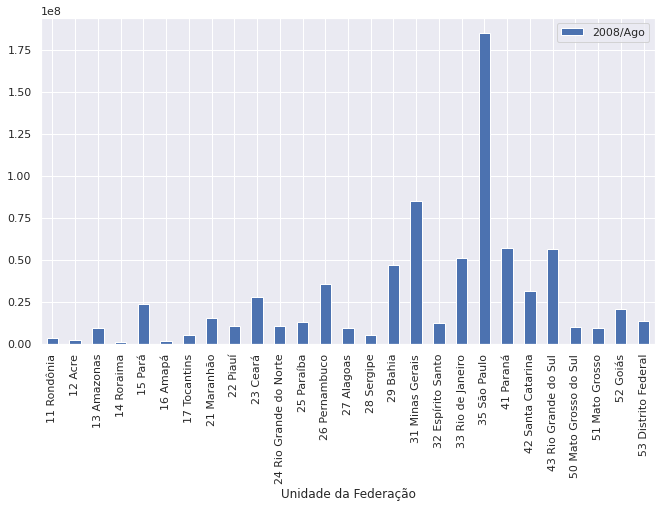

In [ ]:
base_de_dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(11,6))

Melhorou um pouco, mas ainda não está bom. Só que o ***Pandas*** não tem muitos recursos para apresentação gráfica... Vamos recorrer ao ***Matplotlib.pyplot*** para isso.

Com essa biblioteca podemos manipular alguns elementos do gráfico a ser apresentado.

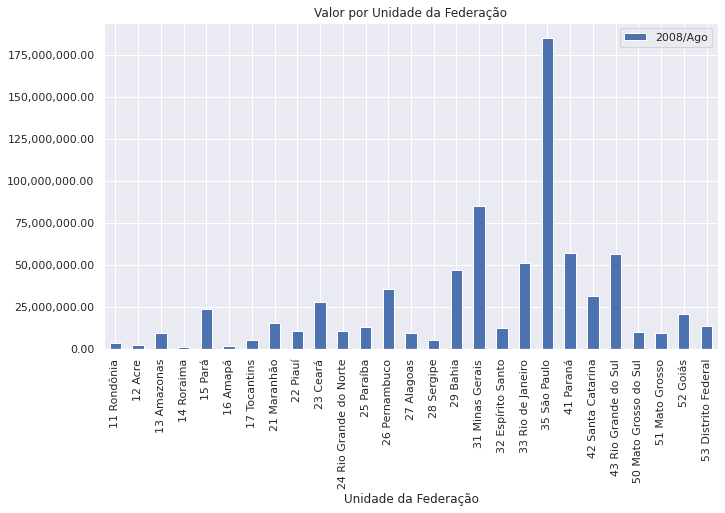

In [ ]:
ax = base_de_dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(11,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title("Valor por Unidade da Federação")
plt.show()

### Desafio - escolher um título mais descritivo, que passe a mensagem adequada

Acho que ainda temos mais coisas para melhorar nesse gráfico, além do título. Acho necessário pelo menos limpar os nomes das UFs e ordenar as colunas pelos valores. Seria interessante também retirar a legenda, pois a informação od mnês de referência pode estar no próprio título. 

Em relação ao título, considero que seria mais adequado usarmos "*Gastos Processados pelo SUS por Unidade da Federação*", colocando o mês e ano como subtítulo.

In [ ]:
# Resolvendo os nomes das UFs na base oficial
base_de_dados[['Código UF','UF']]=pd.DataFrame(base_de_dados['Unidade da Federação'].str.split(' ',1).tolist())

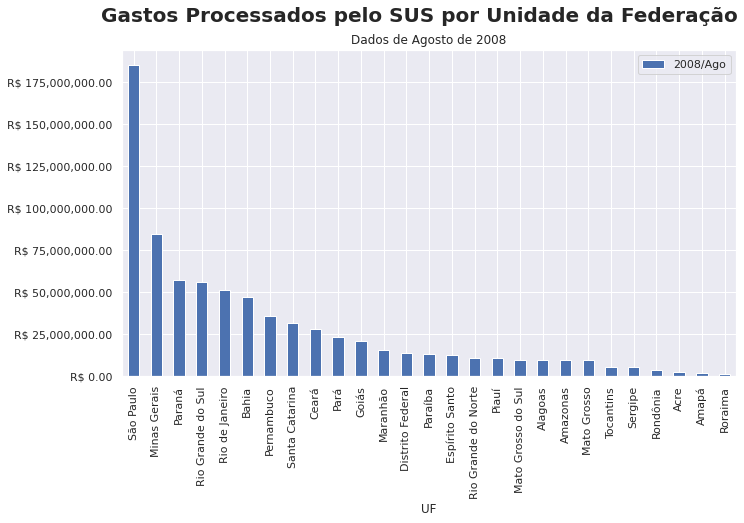

In [ ]:
#### FAZER O DESAFIO ACIMA

# Ordenando as informações
ordem_lista=base_de_dados.loc[:,['UF','2008/Ago']].sort_values(by=['2008/Ago'], ascending=False,ignore_index=True)

ax = ordem_lista.plot(x='UF', y='2008/Ago', kind='bar', figsize=(11,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))

# Melhorando o título do gráfico
plt.suptitle('Gastos Processados pelo SUS por Unidade da Federação', fontweight='bold', fontsize=20)
plt.title('Dados de Agosto de 2008')

plt.show()

### Desafio - fazer a mesma análise para o mês mais recente da base de dados

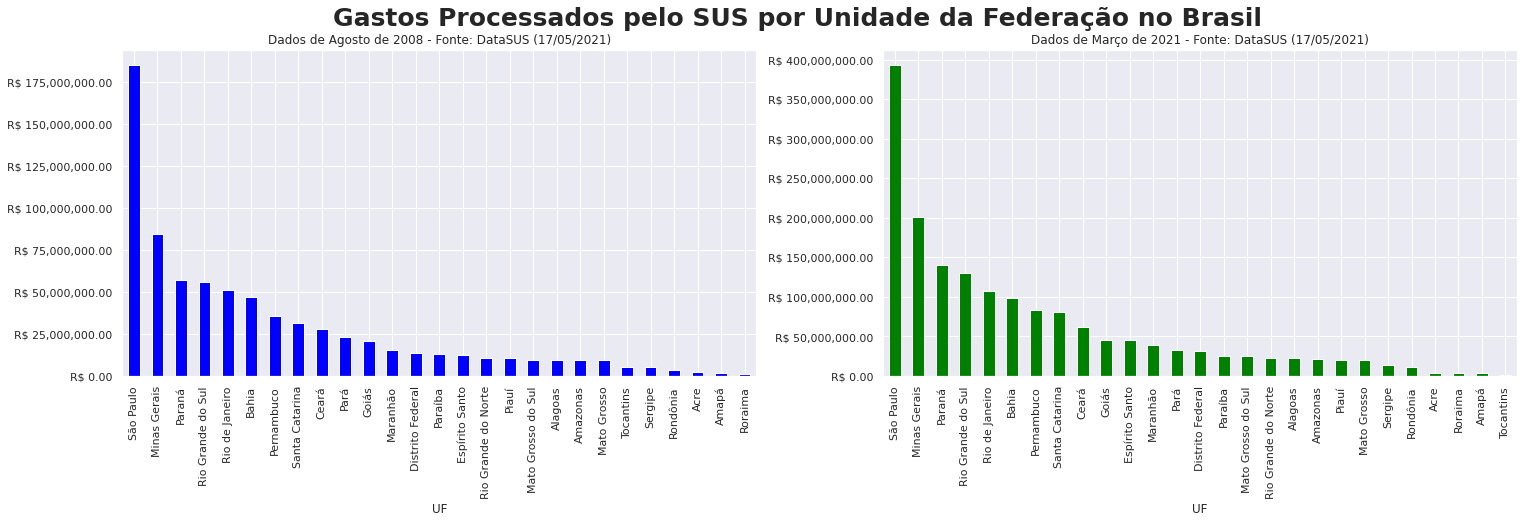

In [ ]:
### FAZER O DESAFIO ACIMA
# Aproveitei e coloquei os gráficos lado a lado

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25,6))
fig.suptitle('Gastos Processados pelo SUS por Unidade da Federação no Brasil',fontweight='bold', fontsize=25)

# Ordenando as informações
ordem_lista_ax1=base_de_dados.loc[:,['UF','2008/Ago']].sort_values(by=['2008/Ago'], ascending=False,ignore_index=True)
ordem_lista_ax2=base_de_dados.loc[:,['UF','2021/Mar']].sort_values(by=['2021/Mar'], ascending=False,ignore_index=True)

ax1 = ordem_lista_ax1.plot(x='UF', y='2008/Ago', kind='bar', color='blue', ax=ax1, legend=None)
ax2 = ordem_lista_ax2.plot(x='UF', y='2021/Mar', kind='bar', color='green', ax=ax2, legend=None)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))

# Melhorando o título do gráfico
ax1.set_title('Dados de Agosto de 2008 - Fonte: DataSUS (17/05/2021)')
ax2.set_title('Dados de Março de 2021 - Fonte: DataSUS (17/05/2021)')

plt.show()

### O que aprendemos nessa aula?

* Como utilizar o **Tabnet** para buscar dados da saúde Brasileira;
* Como utilizar o ***Google Colaboratory***;
* Como ler um arquivo CSV com ***Pandas***;
* Como ler um arquivo CSV com caracteres especiais do idioma português;
* Como ignorar o cabeçalho de um arquivo CSV;
* O que são *DataFrames*;
* Os desafios de ler um arquivo do mundo real;
* Como formatar a impressão dos dados de um *DataFrame* ***Pandas***;
* Como plotar um gráfico com o ***Pandas***;
* Como formatar a sua visualização;
* Como alterar os ticks do seu gráfico utilizando o ***Matplotlib***.


## Aula 02 - Primeiras Visualizações de Dados

Entendo que vai ser melhor manter o notebook da aula 01 como a primeira seção e continuar com a aula 02 nesse mesmo notebook.

Isso facilita a questão da importação das bibliotecas e aproveitamento de informação já previamente tratada.

Para essa aula iremos trabalhar com os dados de atendimento, que já foi gerado antes e está hospedado no **GitHub**. O endereço já foi armazenado na variável `url_atendimento_UF`. Para evitar confusões, vamos armazenar em outro *DataFrame*.

In [ ]:
base_atends_uf=pd.read_csv(url_atendimento_UF, encoding='ISO-8859-1', skiprows=3, sep=';',skipfooter=12, thousands='.', decimal=',')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.



Como de praxe, vamos rodar um reconhecimento do arquivo importado.

In [ ]:
guias = widgets.TabBar(['Estrutura', 'Registros Iniciais','Registros Finais'], location='top')

with guias.output_to('Estrutura'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nEstrutura da Base de Dados:\n'+color.END)
    print(base_atends_uf.info())
    print('\n')
    print(base_atends_uf.shape)
with guias.output_to('Registros Iniciais'):
    display(base_atends_uf.head())
with guias.output_to('Registros Finais'):
    display(base_atends_uf.tail())


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Estrutura da Base de Dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 284 entries, Unidade da Federação to Total
dtypes: float64(160), object(124)
memory usage: 60.0+ KB
None


(27, 284)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,987378491.55
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,442304966.39
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1881106002.25
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,325020105.87
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4600860374.71


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,873.76,...,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99143937.75,95862593.49,103044767.94,98566147.88,94371567.58,96973500.30,91006554.37,88764855.22,97614085.43,85488519.32,84881491.62,76806748.32,87777332.11,96799361.58,108536525.93,111762290.19,110107867.30,113886837.47,116738266.69,116833971.73,102317646.36,84404640.00,37798832.80,12519477568.82
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16146431.63,14703494.87,16969878.14,17062906.92,17068192.56,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964922.58,17259392.23,18147562.63,19143242.28,17905638.97,18126954.44,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18654501.49,17877667.41,17395566.03,15854121.13,17502042.14,19724932.28,23639938.85,22608351.55,21519151.07,21825003.22,21418665.16,21387005.58,16027788.65,11428462.42,4035989.77,2285153388.94
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,16467803.96,16532335.42,15596133.69,16564324.20,15122951.39,13839763.36,15546808.82,14460507.38,14493916.52,12187688.07,14675991.52,18546814.06,20681571.71,20936140.39,20176196.43,20387936.40,18316623.02,18852854.81,15890528.31,13207979.82,8835890.09,2140727601.58
25,52 Goiás,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33774725.23,30951957.24,34889685.12,33793945.19,36429187.65,33535245.30,35400045.71,35408697.61,33813397.64,36064816.74,34904539.36,34092381.28,34795831.02,33292972.66,34964737.78,36236325.32,37829806.86,35400944.86,36502552.32,38533573.53,36415308.03,37217715.53,36302392.68,34078918.26,36432399.98,34248522.76,34808037.62,28760754.83,35104476.04,38888207.13,45871329.20,47568155.41,47951326.80,45304843.74,39785408.90,37614253.55,35655886.73,32253788.65,24867001.02,4872024608.63
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,21514926.74,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429251.56,18249176.79,19623112.14,18164306.94,21657768.52,25045580.62,26428483.82,23875303.68,21771866.33,23087586.62,20668526.36,22552034.04,22573869.50,19004029.87,14731938.43,2546406797.73


<IPython.core.display.Javascript object>

Podemos ver que o arquivo contém as mesmas 27 linhas (uma para cada Estado e mais o DF), mas tem 284 colunas, sendo que 160 foram importadas como números (*float64*) e outras 124 foram importadas como objeto (*string*).

Diferentemente do arquivo de processamento importado anteriormente, que tinha praticamente todas as colunas e linhas preenchidas, o arquivo de atendimentos apresenta dados esparsos, retroagindo à março de 1992.

Consultando as Notas Técnicas disponibilizadas no DataSUS (pode ser encontrado nesse [link](http://tabnet.datasus.gov.br/cgi/sih/Proced_hosp_loc_int_2008.pdf)), temos a diferença entre as informações de data de atendimento e de processamento.

<img src='https://drive.google.com/uc?id=1uhv1jT44o50Vpyhj8JRC_wKRazL8Q1zN'>

Essa diferença de conceito explica, de certa forma, a existência de dados retroativos apesar de termos solicitado ao DataSUS somente informações posteriores a 2008.

De qualquer forma, não podemos utilizar dados incompletos em nossos estudos pois só conseguiremos fazer cálculos e comparações com as colunas efetivamente preenchidas.

Existem algumas estratégias para tratar a base de dados que apresenta dados inconsistentes ou insuficientes. Em alguns casos podemos optar por usar alguma média, repetir dados anteriores ou posteriores ou até desconsiderar parte dos dados obtidos.

Vamos analisar o que podemos extrair dessa base.

Primeiramente, vamos visualizar quais são as colunas que foram consideradas *strings*, para  depois decidir como tratar as inconsistências. Isso pode ser feito pelo código abaixo:

In [ ]:
base_atends_uf.select_dtypes(include=['object']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
1992/Mar,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,40243.16,-,-,-,-,-,-,-
1992/Abr,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,11449.99,-,-,-,-,-,-,-
1993/Mai,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,34583.77,-,-,-,-,-,-,-
1993/Dez,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,68556.52,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007/Ago,-,-,-,-,913.47,-,725.89,-,3964.15,-,-,-,5844.88,-,578.69,-,-,-,1330.97,105647.85,453.77,-,-,-,-,-,-
2007/Set,-,-,-,-,16533.97,-,-,295.36,-,-,-,-,120078.20,1251.18,-,-,33199.22,-,11554.30,158117.18,399.05,-,-,-,-,-,25100.99
2007/Out,-,283.66,-,-,16752.07,-,-,38101.77,-,-,-,-,19563.38,-,763.04,7705.83,133340.82,5177.83,33925.23,217930.01,5065.10,41639.29,-,26091.94,-,-,10812.21
2007/Nov,-,1249.49,-,-,127373.39,-,-,68636.48,1324.16,45785.29,-,295.36,48533.36,-,8055.68,89049.91,405077.79,16024.23,166905.84,733435.84,76172.36,18420.78,44928.25,74067.97,-,-,36776.17


Para facilitar a visualização na tela, foi feita a transposição das linhas e colunas.

Como pode ser visto, a última coluna que está incompleta é referente aos dados de dezembro de 2007. Coincidentemente, a nossa base de processamento (aula 01), era formada por dados a partir de janeiro de 2008. Esse é um indicativo de que possivelmente a melhor estratégia vai ser desprezar as colunas incompletas. 

Só devemos tomar cuidado pois a primeira coluna ('Unidade da Federação') também é um *string* mas deve ser mantido na base.

Para termos uma garantia de que podemos selecionar uma fatia (*slice*) da nossa base de dados, vamos confirmar quais seriam as colunas a desprezar e quais seriam as colunas a serem consideradas, com a análise abaixo.

In [ ]:
guias = widgets.TabBar(['Colunas a Desprezar', 'Dados a Desprezar','Colunas a Considerar'], location='top')

with guias.output_to('Colunas a Desprezar'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nColunas a Desprezar:\n'+color.END)
    print(base_atends_uf.select_dtypes(include=['object']).columns.tolist())
with guias.output_to('Dados a Desprezar'):
    display(base_atends_uf.select_dtypes(include=['object']).T)
with guias.output_to('Colunas a Considerar'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nColunas a Considerar:\n'+color.END)
    print(base_atends_uf.select_dtypes(include=['float64']).columns.tolist())
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nQuantidade:\n'+color.END)
    print(len(base_atends_uf.select_dtypes(include=['float64']).columns.tolist()))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Colunas a Desprezar:

['Unidade da Federação', '1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez', '1994/Jan', '1994/Fev', '1994/Mai', '1994/Ago', '1994/Nov', '1995/Jan', '1995/Mar', '1995/Jun', '1995/Ago', '1995/Dez', '1996/Fev', '1996/Mar', '1996/Ago', '1996/Dez', '1997/Fev', '1997/Nov', '1998/Fev', '1998/Mar', '1998/Jul', '1998/Ago', '1998/Set', '1998/Out', '1998/Dez', '1999/Fev', '1999/Mar', '1999/Mai', '1999/Jul', '1999/Ago', '1999/Set', '1999/Out', '1999/Nov', '1999/Dez', '2000/Jan', '2000/Fev', '2000/Abr', '2000/Mai', '2000/Jun', '2000/Jul', '2000/Ago', '2000/Set', '2000/Out', '2000/Nov', '2000/Dez', '2001/Jan', '2001/Fev', '2001/Mar', '2001/Abr', '2001/Mai', '2001/Jun', '2001/Jul', '2001/Ago', '2001/Set', '2001/Nov', '2001/Dez', '2002/Jan', '2002/Fev', '2002/Mar', '2002/Mai', '2002/Jun', '2002/Jul', '2002/Out', '2002/Nov', '2002/Dez', '2003/Jan', '2003/Mar', '2003/Abr', '2003/Jun', '2003/Jul', '2003/Ago', '2003/Out', '2003/Nov', '2003/Dez', '2004/Jan', '2004/Fev', '2004/Mar', '200

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
1992/Mar,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,40243.16,-,-,-,-,-,-,-
1992/Abr,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,11449.99,-,-,-,-,-,-,-
1993/Mai,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,34583.77,-,-,-,-,-,-,-
1993/Dez,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,68556.52,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007/Ago,-,-,-,-,913.47,-,725.89,-,3964.15,-,-,-,5844.88,-,578.69,-,-,-,1330.97,105647.85,453.77,-,-,-,-,-,-
2007/Set,-,-,-,-,16533.97,-,-,295.36,-,-,-,-,120078.20,1251.18,-,-,33199.22,-,11554.30,158117.18,399.05,-,-,-,-,-,25100.99
2007/Out,-,283.66,-,-,16752.07,-,-,38101.77,-,-,-,-,19563.38,-,763.04,7705.83,133340.82,5177.83,33925.23,217930.01,5065.10,41639.29,-,26091.94,-,-,10812.21
2007/Nov,-,1249.49,-,-,127373.39,-,-,68636.48,1324.16,45785.29,-,295.36,48533.36,-,8055.68,89049.91,405077.79,16024.23,166905.84,733435.84,76172.36,18420.78,44928.25,74067.97,-,-,36776.17


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Colunas a Considerar:

['2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul', '2008/Ago', '2008/Set', '2008/Out', '2008/Nov', '2008/Dez', '2009/Jan', '2009/Fev', '2009/Mar', '2009/Abr', '2009/Mai', '2009/Jun', '2009/Jul', '2009/Ago', '2009/Set', '2009/Out', '2009/Nov', '2009/Dez', '2010/Jan', '2010/Fev', '2010/Mar', '2010/Abr', '2010/Mai', '2010/Jun', '2010/Jul', '2010/Ago', '2010/Set', '2010/Out', '2010/Nov', '2010/Dez', '2011/Jan', '2011/Fev', '2011/Mar', '2011/Abr', '2011/Mai', '2011/Jun', '2011/Jul', '2011/Ago', '2011/Set', '2011/Out', '2011/Nov', '2011/Dez', '2012/Jan', '2012/Fev', '2012/Mar', '2012/Abr', '2012/Mai', '2012/Jun', '2012/Jul', '2012/Ago', '2012/Set', '2012/Out', '2012/Nov', '2012/Dez', '2013/Jan', '2013/Fev', '2013/Mar', '2013/Abr', '2013/Mai', '2013/Jun', '2013/Jul', '2013/Ago', '2013/Set', '2013/Out', '2013/Nov', '2013/Dez', '2014/Jan', '2014/Fev', '2014/Mar', '2014/Abr', '2014/Mai', '2014/Jun', '2014/Jul', '2014/Ago', '2014/Set', '20

<IPython.core.display.Javascript object>

Considerando somente as colunas numéricas encontramos 160 colunas a partir de janeiro de 2008, ou seja, temos os 159 meses esperados e mais uma coluna totalizadora.

Podemos ver então que a nossa base "utilizável" pode ser montada a partir da primeira coluna da base de dados ('Unidade da Federação') e depois usaremos somente as colunas que foram importadas como numéricas.

Vamos aproveitar esse momento para separar os dados de 'Código UF' e 'UF' em colunas distintas, como fizemos com a base anterior. Só que dessa vez já vamos eliminar a coluna 'Unidade da Federação' e vamos transformar a coluna 'UF' em índice da nossa base, pois sabemos que não teremos dois estados com o mesmo nome. Vamos manter o 'Código UF' pois essa informação pode ser usada mais tarde para relacionar com as regiões ou até mesmo com os municípios,

Outro ponto que pode nos atrapalhar futuramente é a existência da coluna totalizadora (ainda mais por estarmos desconsiderando algumas colunas). Vamos aproveitar esse momento também para excluir essa coluna.

In [ ]:
colunas_uso=base_atends_uf.select_dtypes(include=['float64']).columns.tolist()
colunas_uso.insert(0,'Unidade da Federação')
#colunas_uso.insert(1,'Código UF')
#colunas_uso.insert(2,'UF')
base_atends_uf_uso=base_atends_uf[colunas_uso]

base_atends_uf_uso[['Código UF','UF']]=pd.DataFrame(base_atends_uf_uso['Unidade da Federação'].str.split(' ',1).tolist())

#base_atends_uf_uso=base_atends_uf_uso.drop('Total', axis=1)
del base_atends_uf_uso['Total'] # são duas maneiras de fazer a mesma coisa
del base_atends_uf_uso['Unidade da Federação']

base_atends_uf_uso=base_atends_uf_uso.set_index('UF')
#base_atends_uf_uso['Código UF'] = base_atends_uf_uso['Código UF'].astype(float)

#################################################################
# Essa parte do código eu havia usado para reordenar as colunas,
# mas isso ficou desnecessário com a troca do índice
#
#ordem_colunas=base_atends_uf_uso.columns.tolist()
#ordem_colunas.insert(1, ordem_colunas[-2])
#ordem_colunas.insert(2, ordem_colunas[-1])
#del ordem_colunas[-1]
#del ordem_colunas[-1]
#base_atends_uf_uso = base_atends_uf_uso[ordem_colunas]
#
#################################################################

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Com isso temos a base de dados limpa e pronta para analisar.

In [ ]:
guias = widgets.TabBar(['Estrutura', 'Registros Iniciais','Registros Finais'], location='top')

with guias.output_to('Estrutura'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nEstrutura da Base de Dados:\n'+color.END)
    print(base_atends_uf_uso.info())
    print('\n')
    print(base_atends_uf_uso.shape)
with guias.output_to('Registros Iniciais'):
    display(base_atends_uf_uso.head())
with guias.output_to('Registros Finais'):
    display(base_atends_uf_uso.tail())


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Estrutura da Base de Dados:

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Rondônia to Distrito Federal
Columns: 160 entries, 2008/Jan to Código UF
dtypes: float64(159), object(1)
memory usage: 34.0+ KB
None


(27, 160)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Código UF
UF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,10491.76,140842.37,364891.05,621758.74,1192590.43,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,4384430.09,4173529.95,4293085.61,4674947.02,5087527.81,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,11
Acre,47237.42,179649.61,525527.88,969902.21,1504924.89,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,2500589.76,2749521.65,2473515.82,2801446.23,2672803.31,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,12
Amazonas,3496900.42,573382.57,1868186.15,4153372.48,7781596.57,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,9335803.05,9800511.52,9461664.54,10954545.77,10529645.04,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,13
Roraima,13633.57,84810.98,126895.51,483268.24,715916.98,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,1485166.60,1604886.45,1220176.72,1276120.86,1379942.19,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Código UF
UF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rio Grande do Sul,1671907.54,3099462.41,8411015.60,18058838.17,36754622.02,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380.02,52101637.77,65111965.49,61590828.91,64402291.62,63090640.55,69137004.88,66062629.79,65222011.32,67569409.19,64189115.30,62244282.80,65488387.87,56964528.31,69933577.14,66486835.62,69108367.47,67570770.09,70074754.73,70884009.17,65079794.92,66556015.62,66097030.85,61737098.13,66918913.09,61370763.60,69004974.80,66225068.29,...,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99143937.75,95862593.49,103044767.94,98566147.88,94371567.58,96973500.30,91006554.37,88764855.22,97614085.43,85488519.32,84881491.62,76806748.32,87777332.11,96799361.58,108536525.93,111762290.19,110107867.30,113886837.47,116738266.69,116833971.73,102317646.36,84404640.00,37798832.80,43
Mato Grosso do Sul,666658.95,1017379.45,1857395.61,3038672.21,7180835.58,10257782.00,10167827.24,9602843.49,10272466.74,10814111.53,10371654.90,9140959.80,9771575.46,9648706.17,11784290.10,11240770.37,11155445.90,11796784.62,11956687.54,12420336.71,11489768.73,11698487.88,11286787.17,10814729.24,11570718.38,10920760.16,13204085.81,11711475.20,12671896.78,12584046.80,11808910.05,12917152.45,12429678.06,12526681.04,12305360.94,11190032.82,11894027.89,11691745.82,13243933.73,12611967.81,...,16146431.63,14703494.87,16969878.14,17062906.92,17068192.56,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964922.58,17259392.23,18147562.63,19143242.28,17905638.97,18126954.44,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18654501.49,17877667.41,17395566.03,15854121.13,17502042.14,19724932.28,23639938.85,22608351.55,21519151.07,21825003.22,21418665.16,21387005.58,16027788.65,11428462.42,4035989.77,50
Mato Grosso,282872.13,559331.69,1700905.97,3461668.97,7207838.29,9450300.60,9789875.38,8987811.95,8843061.60,9237298.80,9459192.80,9210598.63,10039582.41,9326576.40,11680730.78,11102643.47,11495694.05,11386425.93,11658855.38,12339077.28,11600187.11,11262247.37,11734970.74,11065381.68,11839990.16,10826512.86,13243684.10,12240702.64,12781426.23,11614062.90,12193931.16,12213130.60,11923683.94,11703375.19,11484917.22,11231134.25,11689015.87,10872461.88,12323295.29,11875884.32,...,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,16467803.96,16532335.42,15596133.69,16564324.20,15122951.39,13839763.36,15546808.82,14460507.38,14493916.52,12187688.07,14675991.52,18546814.06,20681571.71,20936140.39,20176196.43,20387936.40,18316623.02,18852854.81,15890528.31,13207979.82,8835890.09,51
Goiás,52308171.36,420909.71,1068713.08,3257552.81,9567840.29,20362996.88,20022472.33,21054991.27,21410602.15,20610541.50,19940725.98,19343787.54,20817880.66,20215479.18,24174119.21,22943952.73,23781906.69,23683787.01,23293723.39,25835544.14,25151192.72,24757922.75,24104438.24,23202137.78,24629519.

<IPython.core.display.Javascript object>

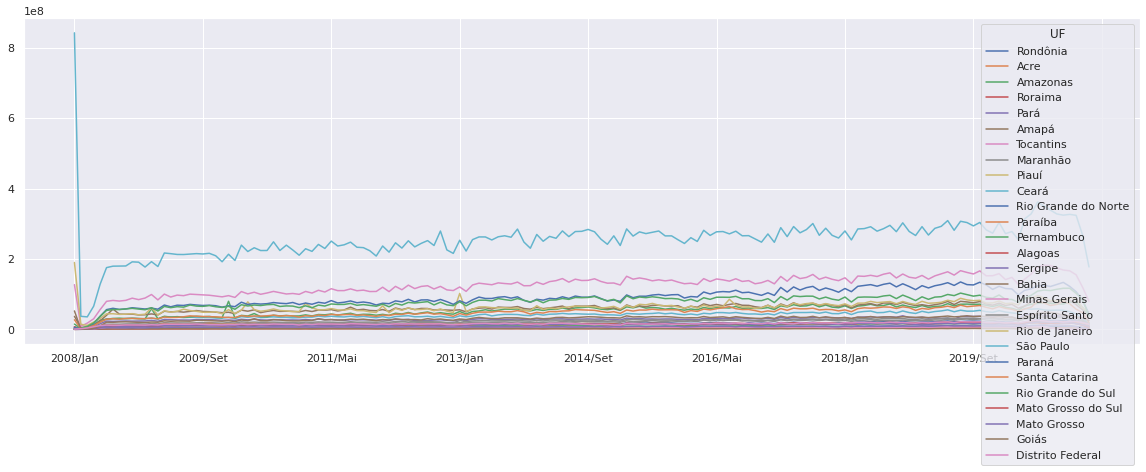

In [ ]:
base_atends_uf_uso.drop('Código UF', axis=1).T.plot(figsize=(20,6))

O gráfico apresenta uma grande distorção no mês de janeiro de 2008, que precisa ser avaliada pois pode ser um erro de importação ou algum outro problema.

Analisando os dados disponibilizados originalmente podemos ver que os números importados estão de acordo com o que está em nossa base de dados, o que nos leva a conclusão de que a distorção está na base original.

Vale lembrar que o sistema utilizado (DataSUS) passou por modificações no ano de 2008, motivo pelo qual as bases disponibilizadas são separadas em dados anteriores e posteriores a 2008. Isso pode ter causado algum tipo de represamento das informações ou até mesmo algum tipo de normalização que envolveu o lançamento de um conjunto maior de dados nos meses iniciais.

Retirando o mês de janeiro de 2008 podemos analisar melhor o gráfico e perceber que a distorção continuou por alguns meses. Após os valores excessivos de janeiro tivemos valores extremamente baixos até abril. Depois disso os dados parecem ficar mais regulares, como pode ser visto abaixo.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

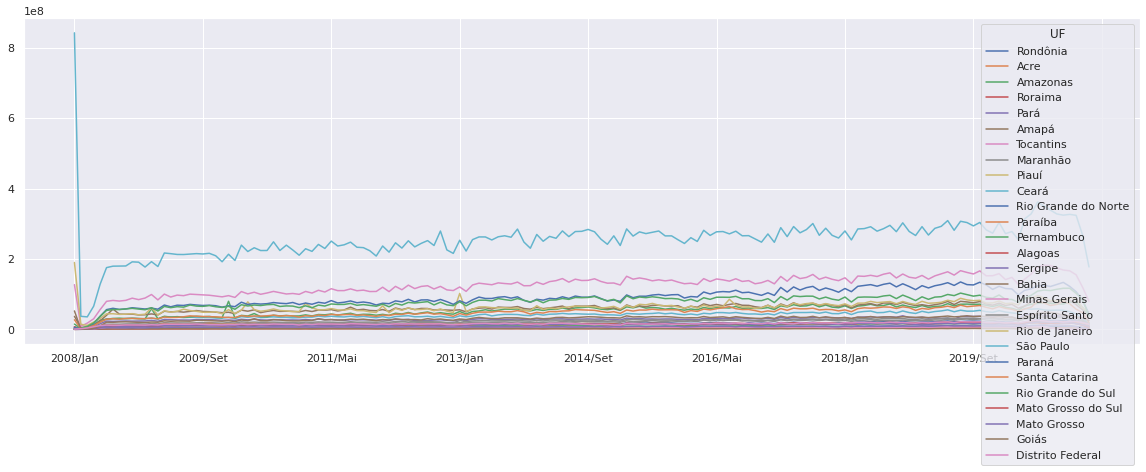

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

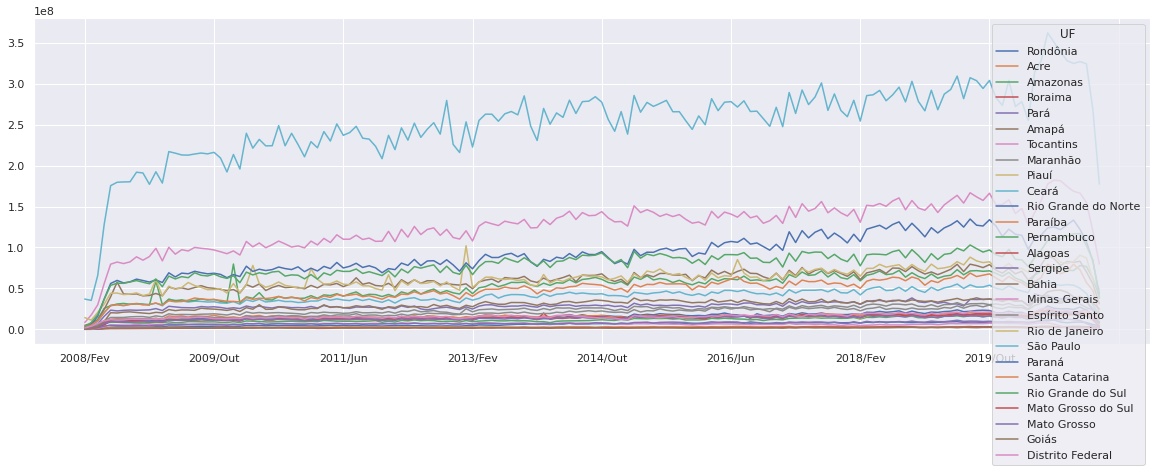

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

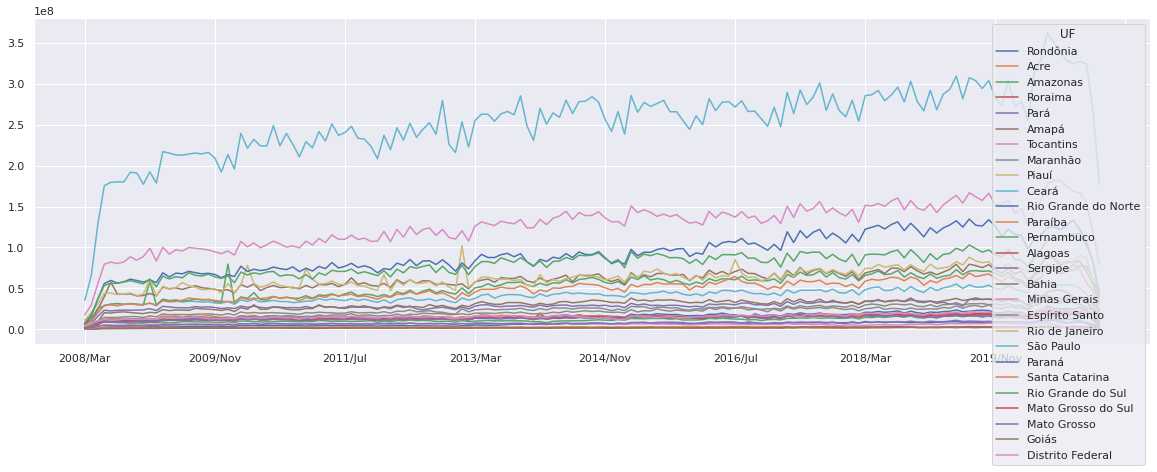

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

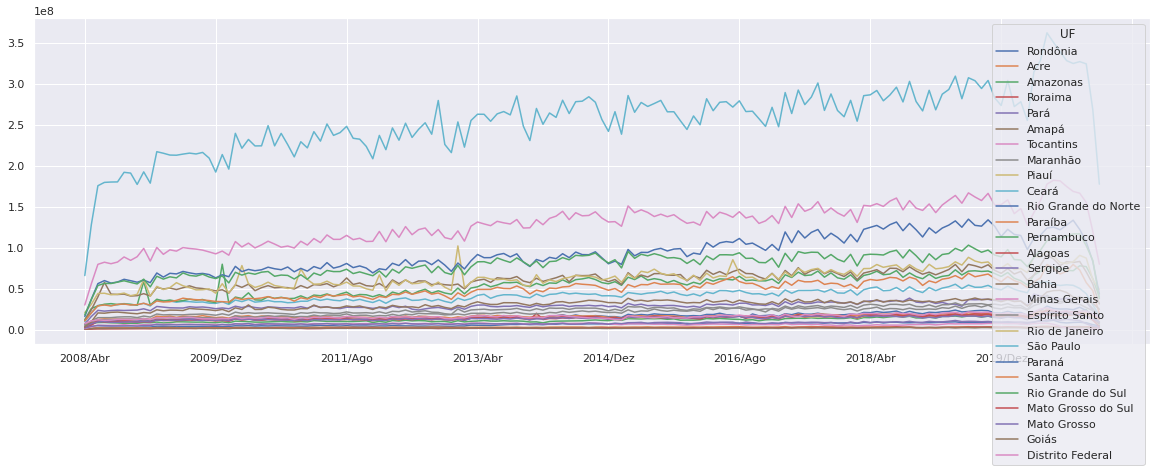

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

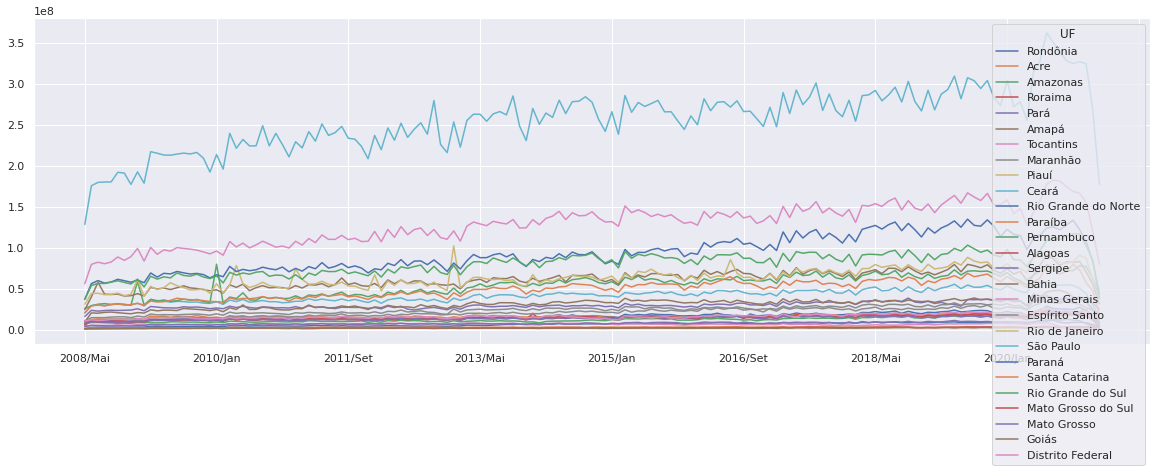

<IPython.core.display.Javascript object>

In [ ]:
guias = widgets.TabBar(['Dados Completos','Fev/2008 em diante', 'Mar/2008 em diante','Abr/2008 em diante','Mai/2008 em diante'], location='top')

with guias.output_to('Dados Completos'):
    base_atends_uf_uso.drop('Código UF', axis=1).T.plot(figsize=(20,6))
with guias.output_to('Fev/2008 em diante'):
    base_atends_uf_uso.drop(['2008/Jan','Código UF'], axis=1).T.plot(figsize=(20,6))
with guias.output_to('Mar/2008 em diante'):
    base_atends_uf_uso.drop(['2008/Jan','2008/Fev','Código UF'], axis=1).T.plot(figsize=(20,6))
with guias.output_to('Abr/2008 em diante'):
    base_atends_uf_uso.drop(['2008/Jan','2008/Fev','2008/Mar','Código UF'], axis=1).T.plot(figsize=(20,6))
with guias.output_to('Mai/2008 em diante'):
    base_atends_uf_uso.drop(['2008/Jan','2008/Fev','2008/Mar','2008/Abr','Código UF'], axis=1).T.plot(figsize=(20,6))

plt.show()

Podemos ver que o gráfico ainda continua meio estranho, de difícil entendimento, principalmente porque temos o estado de São Paulo destoando demais dos outros estados, forçando a escala do gráfico.

Além disso podemos ver que a distribuição dos valores é bem irregular, com alguns estados apresentando "picos" de valores em determinados meses, o que levanta pontos a serem investigados.

Mas o gráfico de linhas não é o mais adequado para avaliar uma quantidade tão grande e díspare de dados. Mesmo excluindo os dados de *São Paulo* e *Minas Gerais* do gráfico (os dois maiores valores), ainda não conseguimos ter a leitura de quais estados apresentam as maiores distorções, dada a quantidade de linhas sobrepostas.

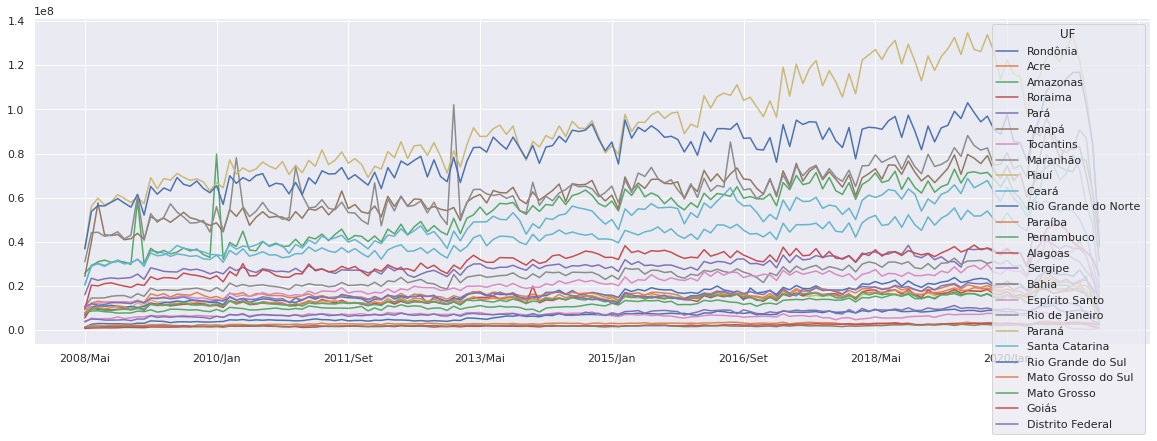

In [ ]:
base_atends_uf_uso.drop(['São Paulo','Minas Gerais']).drop(['2008/Jan','2008/Fev','2008/Mar','2008/Abr','Código UF'], axis=1).T.plot(figsize=(20,6))
plt.show()

Buscando uma alternativa para facilitar a visualização dos dados, encontrei a biblioteca `plotly.graph_objects`, que nos dá o recurso de interatividade no gráfico que pode ajudar a identificar quais são os dados que destoam dos demais.

Acrescentei a importação dela lá no bloco inicial deste *notebook*.

Essa biblioteca também conta com alguns outros recursos que melhoram a legibilidade do gráfico.

In [ ]:
guias = widgets.TabBar(['Dados Completos','Fev/2008 em diante','Sem 2021'], location='top')

layout = go.Layout(
    autosize=False,
    width=1300,
    height=500,
    margin=go.layout.Margin(
        l=0,
        r=0,
        b=10,
        t=10,
        pad = 4
    )
)

fig1=go.Figure(layout=layout)
fig2=go.Figure(layout=layout)
fig3=go.Figure(layout=layout)

with guias.output_to('Dados Completos'):
    t = base_atends_uf_uso.columns.drop('Código UF')
    for estado in base_atends_uf_uso.index:
        y=base_atends_uf_uso.T[estado]
        fig1.add_trace(go.Scatter(x=t,y=y,mode='lines',
            name=estado, text=estado))
    fig1.update_layout(
        hoverlabel=dict(
            bgcolor="white",
            font_size=12))
    fig1.show()

with guias.output_to('Fev/2008 em diante'):
    t = base_atends_uf_uso.columns.drop(['Código UF','2008/Jan'])
    for estado in base_atends_uf_uso.index:
        y=base_atends_uf_uso.T[estado].drop('2008/Jan')
        fig2.add_trace(go.Scatter(x=t,y=y,mode='lines',
            name=estado, text=estado))
    fig2.update_layout(
        hoverlabel=dict(
            bgcolor="white",
            font_size=12))
    fig2.show()

with guias.output_to('Sem 2021'):
    t = base_atends_uf_uso.columns.drop(['Código UF','2008/Jan','2021/Jan','2021/Fev','2021/Mar'])
    for estado in base_atends_uf_uso.index:
        y=base_atends_uf_uso.T[estado].drop(['2008/Jan','2021/Jan','2021/Fev','2021/Mar'])
        fig3.add_trace(go.Scatter(x=t,y=y,mode='lines',
            name=estado, text=estado))
    fig3.update_layout(
        hoverlabel=dict(
            bgcolor="white",
            font_size=12))
    fig3.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

O gráfico fica um pouco melhor, mas ainda não atende bem às nossas necessidades.

Mas podemos ver que, por *default* a biblioteca já coloca os *ticks* do eixo ***x*** na vertical, acerta a escala para apresentar valores em milhões de Reais, desloca a legenda para fora do gráfico e inclui uma barra de rolagem, em função da quantidade de linhas que temos.

Mas o melhor benefício dessa biblioteca, no meu ponto de vista, é a responsividade obtida ao criar a funcionalidade de *hover* para analisar o gráfico. Ao passarmos o cursor sobre um determinado ponto de uma das linhas, surge um *label* com os dados que levaram a plotagem daquele ponto. Isso nos ajuda a identificar mais facilmente quais são os pontos fora da curva!

### Desafio:reposicionar a legenda. Dentro? Fora? Onde?

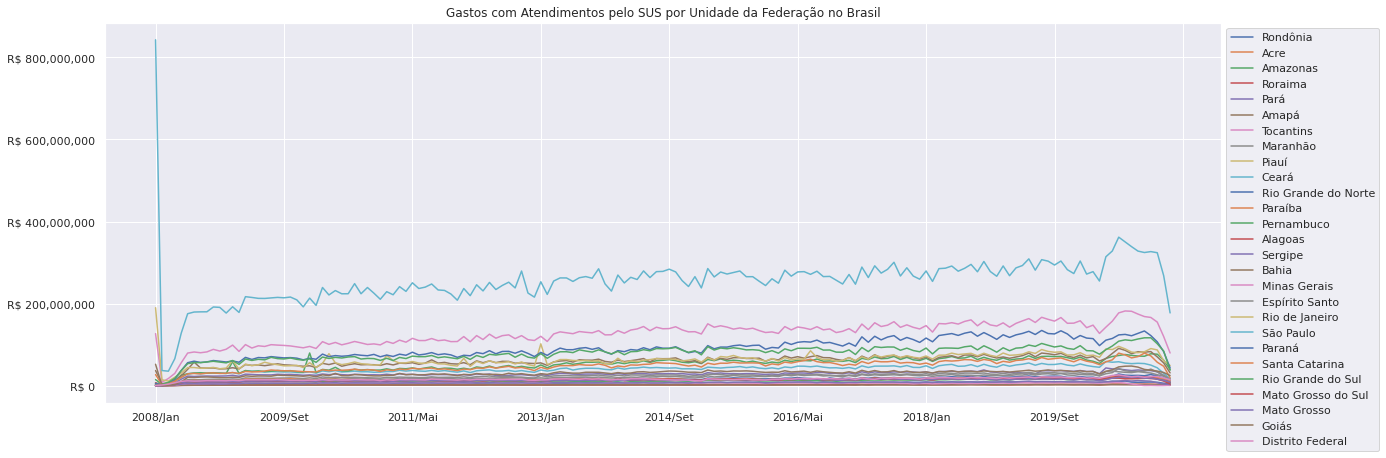

In [ ]:
ax=base_atends_uf_uso.T.drop('Código UF').plot(figsize=(20,7))
ax.legend(bbox_to_anchor=(1,1), loc='upper left', ncol=1)
plt.title('Gastos com Atendimentos pelo SUS por Unidade da Federação no Brasil')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.0f}'))
plt.show()

### Desafio: selecionar apenas 5 estados para plotar o gráfico

No lugar de escolher as 5 UFs a serem plotadas, resolvi fazer a geração aleatória dos dados a serem plotados. Como a documentação indica que os dados gerados diretamente pela função `sample` não são totalmente aleatórios, optei por importar a biblioteca `random`, mais completa nesse sentido, que gera uma seleção mais aleatória dos dados.

O código faz um teste dessa aleatoriedade, mostrando que mesmo com o uso de uma mesma *seed* teremos seleções diferentes.

In [ ]:
# Teste de sorteio aleatório de 5 estados da base

print(color.DARKCYAN+color.ITALIC+color.BOLD+'\nUsando Sample sem seed, duas vezes'+color.END)
print('Lista 1 = ',list(base_atends_uf_uso.drop('Código UF',axis=1).sample(5).index))
print('Lista 2 = ',list(base_atends_uf_uso.drop('Código UF',axis=1).sample(5).index))

print(color.DARKCYAN+color.ITALIC+color.BOLD+'\nUsando Sample Fixando seed, duas vezes'+color.END)
np.random.seed(220521)
print('Lista 1 = ',list(base_atends_uf_uso.drop('Código UF',axis=1).sample(5).index))
np.random.seed(220521)
print('Lista 2 = ',list(base_atends_uf_uso.drop('Código UF',axis=1).sample(5).index))

print(color.DARKCYAN+color.ITALIC+color.BOLD+'\nUsando Sample Fixando seed e random, duas vezes'+color.END)
np.random.seed(220521)
print('Lista 1 = ',random.sample(list(base_atends_uf_uso.drop('Código UF',axis=1).index), 5))
np.random.seed(220521)
print('Lista 2 = ',random.sample(list(base_atends_uf_uso.drop('Código UF',axis=1).index), 5))



Usando Sample sem seed, duas vezes
Lista 1 =  ['Amazonas', 'Tocantins', 'Goiás', 'São Paulo', 'Mato Grosso do Sul']
Lista 2 =  ['Amapá', 'São Paulo', 'Maranhão', 'Rondônia', 'Mato Grosso']

Usando Sample Fixando seed, duas vezes
Lista 1 =  ['Amazonas', 'Paraíba', 'Piauí', 'São Paulo', 'Rio Grande do Norte']
Lista 2 =  ['Amazonas', 'Paraíba', 'Piauí', 'São Paulo', 'Rio Grande do Norte']

Usando Sample Fixando seed e random, duas vezes
Lista 1 =  ['Bahia', 'Distrito Federal', 'Pará', 'Maranhão', 'Mato Grosso do Sul']
Lista 2 =  ['Rio Grande do Norte', 'Rondônia', 'Amapá', 'Santa Catarina', 'Ceará']


Como podemos ver pelo teste acima, a função `sample` vai nos retornar uma seleção pseudo-aleatória, pois vai variar de acordo com o *seed* estabelecido.

Sendo assim, nossa decisão por usar a biblioteca `random` ou não vai depender de termos a intenção ou necessidade de que a seleção sorteada seja sempre a mesma. Caso nossa necessidade seja de dados realmente aleatórios, é melhor o uso da biblioteca `random`.

Vamos então plotar 5 estados realmente aleatórios com o código abaixo.

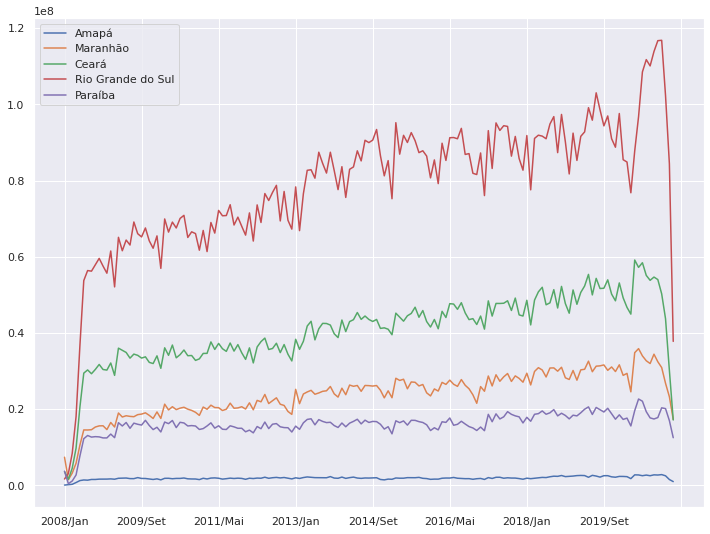

In [ ]:
# Gráfico sorteando 5 estados aleatoriamente

estados_rand = random.sample(list(base_atends_uf_uso.drop('Código UF',axis=1).index), 5)
base_atends_uf_uso.drop('Código UF',axis=1).loc[estados_rand,:].T.plot(figsize = (12,9))

plt.legend(loc='best')
plt.show()

### **DESAFIO EXTRA:** Melhorar o gráfico deixando-o responsivo usando o **`plotly.express`**

A biblioteca `plotly.express` tem algumas facilidades adicionais mas estou considerando como um desafio extra porque realmente foi o que mais me tomou tempo no Bootcamp até agora. Mesmo estudando extensivamente a documentação e recorrendo a colegas no **Discord**, não conseguia fazer os gráficos funcionarem...

Cheguei ao ponto de pedir a um colega (obrigado Drago#8354!) para ele enviar o código dele funcionando, mas não adiantou. O código que roda perfeitamente para ele (utilizando o **VS Code**, talvez seja por isso) não funcionou no **Google Colab**, dando a mesma mensagem de erro de incompatibilidade de eixos **x** e **y**...

Analisando mais detalhadamente a documentação vi que a biblioteca demandava uma base de dados estruturada de maneira diferente, em que todos os dados estivessem nas linhas, sendo que em nossa base atual temos as informações referentes aos meses nos nomes das colunas.

Sendo assim, gerei um *DataFrame* específico para usar como base para esse gráfico, aproveitando o "caminho" para aprender mais sobre a manipulação de listas, séries e *DataFrames* no **Python**.

Esse primeiro módulo de código gera essa nova base para o gráfico, usando a lista de UFs que for colocada na variável `lista_estados`. Para efeitos de comparação, apesar de ser possível gerar uma nova lista aleatória de UFs, coloquei os mesmos 5 estados que foram usados no desafio acima, de forma a permitir a comparação entre os gráficos. Se a intenção for gerar uma nova lista aleatória, basta inverter o comentário das linhas 3 e 4. Outra opção é criar uma lista manualmente para selecionar os estados que queremos visualizar (esse código está comentado na linha 5 do código abaixo):

In [ ]:
base_graf=pd.DataFrame(columns=['Data','UF','Valores'])

#lista_estados=random.sample(list(base_atends_uf_uso.drop('Código UF',axis=1).index), 5)
lista_estados=estados_rand
#lista_estados=['Tocantins', 'Piauí', 'Goiás', 'Amapá', 'Acre']

for cada_estado in lista_estados:
    anos_meses=base_atends_uf_uso.T.drop('Código UF').index
    dados_mensais=base_atends_uf_uso.drop('Código UF',axis=1).loc[cada_estado]

    base_temp=pd.DataFrame({'Data':anos_meses,
                            'UF':cada_estado,
                            'Valores':dados_mensais})
    base_temp=base_temp.reset_index()
    del base_temp['index']
    base_graf=base_graf.append(base_temp, ignore_index=True)

In [ ]:
guias = widgets.TabBar(['Estrutura', 'Registros Iniciais','Registros Finais','Contagem de Valores'], location='top')

with guias.output_to('Estrutura'):
    print(color.BOLD+color.UNDERLINE+color.DARKCYAN+'\nEstrutura da Nova Base de Dados\n'+color.END)
    print(base_graf.info())
    print('\n')
    print(base_graf.shape)
with guias.output_to('Registros Iniciais'):
    display(base_graf.head())
with guias.output_to('Registros Finais'):
    display(base_graf.tail())
with guias.output_to('Contagem de Valores'):
    print('\n')
    display(base_graf['UF'].value_counts())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Estrutura da Nova Base de Dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Data     795 non-null    object 
 1   UF       795 non-null    object 
 2   Valores  795 non-null    float64
dtypes: float64(1), object(2)
memory usage: 18.8+ KB
None


(795, 3)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Data,UF,Valores
0,2008/Jan,Amapá,81218.67
1,2008/Fev,Amapá,190886.10
2,2008/Mar,Amapá,282811.13
3,2008/Abr,Amapá,744508.62
4,2008/Mai,Amapá,1256941.15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Data,UF,Valores
790,2020/Nov,Paraíba,17799651.06
791,2020/Dez,Paraíba,20355212.85
792,2021/Jan,Paraíba,20149018.68
793,2021/Fev,Paraíba,16996494.03
794,2021/Mar,Paraíba,12517894.05


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Rio Grande do Sul    159
Ceará                159
Amapá                159
Maranhão             159
Paraíba              159
Name: UF, dtype: int64

<IPython.core.display.Javascript object>

Podemos ver que a nova base de dados fica com muito mais linhas e reduz drasticamente a quantidade de colunas.

Mas vamos ver que efeito isso vai ter na simplificação da configuração inicial do gráfico:

In [ ]:
fig=px.line(base_graf,x='Data',y='Valores',color='UF')
fig.show()

Uma linha muito simples de código consegue nos trazer esse gráfico **responsivo** e visualmente mais agradável que os anteriores.

Se retirarmos de nossa base as datas que avaliamos anteriormente como contendo uma certa distorção nos dados (de janeiro à abril de 2008 e os dados de 2021), ficamos com o seguinte gráfico:

In [ ]:
datas_distorcidas=['2008/Jan','2008/Fev','2008/Mar','2008/Abr','2021/Jan','2021/Fev','2021/Mar']

base_graf_reduzida=base_graf[~base_graf.Data.isin(datas_distorcidas)]

fig=px.line(base_graf_reduzida,x='Data',y='Valores',color='UF')
fig.show()

### O que aprendemos nessa aula?

* Como realizar um *slice* no *DataFrame* com ***Pandas***;
* Formas de lidar com dados faltantes;
* Utilizar o *insert* do ***Pandas***;
* Como transpor sua matriz de dados.